# Tutorial 5: Control Design
Welcome to Tutorial 5, where we will be looking at controller design. The tutorial will be focusing on PID control, you will implement and tune a PID controller for a one DOF system.

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Objectives

**Objectives:**
* Implement the PID control equations.
* Tune the PID controller gains to achieve a suitable response.
* Gain an intuitive understanding of how changing control gains affects the system response.

## PID Control

A proportional–integral–derivative controller (PID controller) is a type of feedback or closed-loop controller that is widely used in industrial control systems. The PID controller calculates an error $e(t)$ at each time step $h$. This error value is the difference between a reference or target $r(t)$ and an actual output or controlled variable $y(t)$. The controller works by reducing the error by adjusting the control variable $u(t)$, based on the weighted sum of the proportional, integral and derivative terms with their respective gains. 

An everday example of feedback control is cruise control, where the driver sets a target speed and the controller has to work to reduce the error between its current  and target speed. The cruise controller may have other requirements such as having minimal delay and not overshooting the target speed. 

<img src="tp5/PID.svg" style="width: 700px;">

<br/>
<img src="tp5/continuous_PID.png" style="width: 300px;">

## PID Gain Tuning
There are a number of methods for tuning a PID controller to get a desired response. Below is a summary of how increasing each of the control gains affects the response:


| Parameter | Rise time    | Overshoot  | Settling time | Steady-state error | Stability |
| :---------|:------------:| ----------:|:-------------:|:------------------:| :--------:|
| $K_p$     | Decrease     | Increase   | Small change  | Decrease           | Degrade   |
| $K_i$     | Decrease     | Increase   | Increase      | Eliminate          | Degrade   |
| $K_d$     | Minor change | Decrease   | Decrease      | No effect          | Improve if $K_d$ small |

In this tutorial, we will be implementing and tuning the PID controller for a one DOF system. This could for example represent a particle moving vertically in one dimension under an acceleration.

### Tasks:
* Implement the PID control loop equations
* Tune the gains of the PID loop

### Implement PID Controller

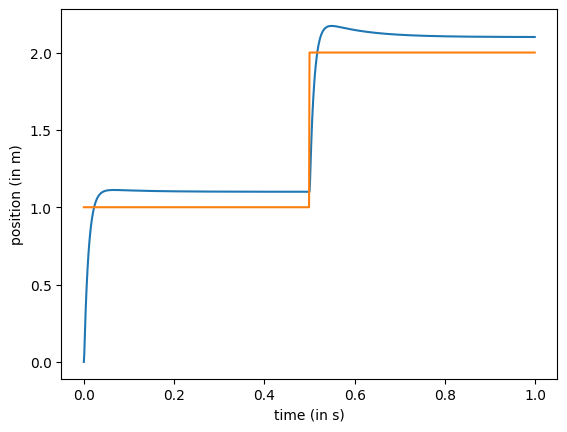

In [120]:
class OneDofSystem(object):
    def __init__(self, x, v, biasAcceleration=1):
        self.x = x
        self.v = v
        self.biasAcceleration = biasAcceleration
        
    def step(self, u, h):
        # Returns the updated position x and velocity v after one time step h
        a = self.biasAcceleration + u
        self.x = self.x + h*self.v + 1./2.*a*h**2 # calculate new position
        self.v = self.v + h*a # calculate new velocity
        
    def sense(self):
        # Returns the current position
        return self.x
    
def response(system, k_p, k_d, k_i):
    sys = system(0, 0)
        
    x_target = 1 # Set target position
    delta_x_target = 1 # Updating the target 
    
    h = 0.001 # dt
    x_old = sys.sense() # initial position of the system
    
    e_old = 0 # initial error
    e_i = 0 # initial intergral error
    
    x_list = []
    target_list = []
 
    for c in range(1000):       
        # obtain current position of system         
        x = sys.sense()
        
        # half-way update the target         
        if c==500:
            x_target += delta_x_target
        
        # Implement the discretized PID loop equations 
        ### START CODE HERE ### (~ 4 lines of code)
        e = x_target - x   # fix me! 1. Calculate the error in position 
        e_d = (e - e_old) / h  # fix me! 2. Calculate derivative of the error
        e_i += e * h # fix me! 3. Calculate integral of the error  
        u = k_p*e + k_d*e_d + k_i*e_i # fix me! 4. Calculate the output of the PID
        ### END CODE HERE ###
        
        # apply control effort, u (acceleration)
        sys.step(u, h)
        
        x_old = x # store previous position 
        e_old = e # store previous error 
        
        # store position, target and time for plotting reasons         
        x_list.append(x)
        target_list.append(x_target)
        time = np.arange(1000)*h
    return time, np.array(x_list), np.array(target_list)

# Tune the PID equations
### START CODE HERE ### (3 lines of code)    
k_p = 1000 # fix me! 
k_d =  100# fix me! 
k_i = 0 # fix me! 
### END CODE HERE ###

systemFun = lambda x, v : OneDofSystem(x,v, 100)
time, position, target = response(systemFun, k_p, k_d, k_i)       
    
plt.plot(time, position)
plt.plot(time,np.ones(time.shape)*target)
plt.xlabel("time (in s)")
plt.ylabel("position (in m)")

plt.show()   

## Questions

1. What happens with only a proportional gain and why? (P)
2. What is the effect of adding $K_d$ gain? (PD)
3. How do you create a faster response? (PD)
4. What happens when the $K_d$ is too high? (PD)
5. What is the effect of the integral gain $K_i$? (PID)
6. When would you use an integral gain? (PID)
7. What are two downsides of using the integral gain? (PID)

***


## Answers
1. Adding $K_p$ will make the control oscillate around the target, but will give it no stability. - Has no damping.
2. It makes the control stabilise to the position - it adds damping.
3. Increase $K_p$ and $K_d$.
4. It overshoots at the start, before damping around the location.  - That is an artifact of the discretisation, in ideal system it would cause reaching the state slowly
5. ?? - Accumulates error over time and eliminates steady-state error - eventually reach steady state error
6. ?? - Use $K_i$ when system has steady state error such as gravity or friction.
7. One is that a high integral gain dereases stability. - The second is integral windup: the term accumulates large values causing overshoot and oscillations.

## References
https://en.wikipedia.org/wiki/PID_controller#Mathematical_form

Franklin, G.F., Powell, J.D., Emami-Naeini, A. and Powell, J.D., 1994. Feedback control of dynamic systems (Vol. 3). Reading, MA: Addison-Wesley.

code reference authors : Wouter Wolfslag, Nikhil Advani and Kostas Alexis

#### Authors : Jack Wilkinson and Theodoros Stouraitis